In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
sns.set_style("ticks")

In [2]:
random = np.random.default_rng(seed=13)

# Pareto v Exponential distribution

Let $x_1, x_2, \ldots, x_n$ be independent r.v.s having a commonn distribution $X$. We can use $\frac{1}{n}\sum_{i=1}^{n}x_i$ as an estimation for the expected value of $X$. Let $N_0 = 1000$, and $S = 1000$.

In [3]:
## constants
N_0 = 1000
S = 1000

## part (a)
Use `np.randon.pareto(alpha, n)` to create $n$ instances of a Pareto distribution with parameters $\alpha=2$ and $m=1$.

In [4]:
n = 1000
alpha_pareto = 2
pareto_instances = random.pareto(a=alpha_pareto, size=n) + 1
pareto_instances[:5]

array([2.35201642, 2.03193214, 2.23019956, 1.01811099, 1.08054701])

## part (b)

Choose a value $N_1 > N_0 + 50S$. Vary $n$ from $N_0$ to $N_1$ by steps of size $S$, and estimate the expected value of the Pareto distribution for each $n$. Plot your estimation for each value of $n$.

In [5]:
n_vals = [N_0 + i*S for i in range(0, 100)]

pareto_expect = [0] * len(n_vals)
for i, n in enumerate(n_vals):
    instances = random.pareto(a=alpha_pareto, size=n) + 1
    pareto_expect[i] = np.mean(instances)

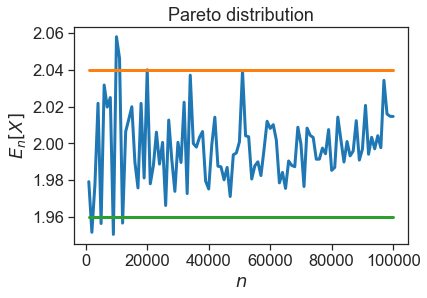

In [6]:
sns.lineplot(x=n_vals, y=pareto_expect)
sns.lineplot(x=n_vals, y=[2.04 for _ in n_vals])
sns.lineplot(x=n_vals, y=[1.96 for _ in n_vals])
plt.title('Pareto distribution')
plt.xlabel(r'$n$')
plt.ylabel(r'$E_n[X]$')
plt.show()

## part (c)

By observing the plot of part **b**, find (by trial and error) the value $N_1$ for which your estimation lies within $2\%$ of the expected value of the Pareto distribution for $50$ consecutive steps before $N_1$, i.e., your estimation must lie within $2\%$ of the expected value for $n = N_1 −50S,N_1 −49S,N_1 −48S, \ldots, N_1$.

In [7]:
n_vals[-50]

51000

For the value of $N_1 = 100$, we find that the estimated expected value is within $2\%$ of the expected value $E[X] = 2$, as shown by the horizonal lines.

## part (d)
Repeat parts **a - c** for an exponential distribution with parameter $\lambda = 2$. You can use `np.random.exponential(λ, n)` from the Numpy library.

In [8]:
n = 1000
lamb = 2
exp_instances = random.exponential(scale=1/lamb, size=n)
exp_instances[:5]

array([0.55873402, 0.38053583, 0.19767515, 0.15915968, 0.68635242])

In [9]:
n_vals = [N_0 + i*S for i in range(0, 60)]

exp_expect = [0] * len(n_vals)
for i, n in enumerate(n_vals):
    instances = random.exponential(scale=1/lamb, size=n)
    exp_expect[i] = np.mean(instances)

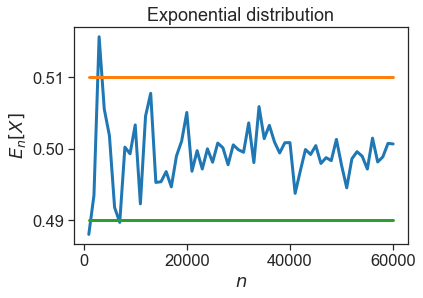

In [10]:
sns.lineplot(x=n_vals, y=exp_expect)
sns.lineplot(x=n_vals, y=[0.51 for _ in n_vals])
sns.lineplot(x=n_vals, y=[0.49 for _ in n_vals])
plt.title('Exponential distribution')
plt.xlabel(r'$n$')
plt.ylabel(r'$E_n[X]$')
plt.show()

For the value of $N_1 = 60$, we find that the estimated expected value is within $2\%$ of the expected value $E[X] = 1/2$, as shown by the horizonal lines.

## part (e) 

Compare $N_1$ derived in part c for the Pareto and exponential distributions. What is your observation?

The value of $N_1$ for the exponential distribution is much smaller than that for the Pareto distribution. The Pareto distribution is a _heavy tail_ distribution; its tail is not exponentially bounded. This leads to more instances much greater than the expected value for a given $n$.